In [126]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.python.keras import regularizers
from keras.layers import Activation, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import StandardScaler

In [127]:
data = pd.read_csv("Student data.csv")

In [128]:
data.head()

,Student Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Independent variables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,First Term Gpa' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Second Term Gpa' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,First Language' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Funding numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
data = data[23:]
columns = ["first_term_gpa","second_term_gpa","language","funding","school","fasttrack","coop","residency","gender","prev_education","age_group",
                "high_school_average_mark","math_score","english_grade","first_year_persistence"
]
data.columns = columns

In [130]:
data.head()

,first_term_gpa,second_term_gpa,language,funding,school,fasttrack,coop,residency,gender,prev_education,age_group,high_school_average_mark,math_score,english_grade,first_year_persistence
23,0,0,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,59,16,7,1.0
24,2.5,2,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,?,?,7,1.0
25,4.25,3.923077,1,1.0,6.0,2.0,1.0,1.0,1.0,2,3,92,41,9,1.0
26,3.020833,2.321429,3,4.0,6.0,1.0,2.0,2.0,2.0,2,3,?,?,8,1.0
27,4.275,4.326923,1,2.0,6.0,1.0,1.0,1.0,1.0,2,3,97,?,9,1.0


In [131]:
data.tail()

,first_term_gpa,second_term_gpa,language,funding,school,fasttrack,coop,residency,gender,prev_education,age_group,high_school_average_mark,math_score,english_grade,first_year_persistence
1455,1.413043,0,?,4.0,6.0,2.0,2.0,2.0,2.0,1,1,?,47,10,0.0
1456,4.36,4.074074,1,2.0,6.0,1.0,1.0,1.0,1.0,2,4,?,?,10,1.0
1457,2.020833,2.45,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,78,18,9,1.0
1458,4.021739,4.357143,?,4.0,6.0,2.0,1.0,2.0,1.0,1,2,?,46,8,1.0
1459,2.133333,3.205882,1,2.0,6.0,2.0,2.0,1.0,1.0,1,1,81,27,9,1.0


In [132]:
data.replace('?', np.nan, inplace=True)

for column in data.columns:
    # print(column)
    data[column].fillna(data[column].median(),inplace=True)
    

In [142]:
data.head(20)

,first_term_gpa,second_term_gpa,language,funding,school,fasttrack,coop,residency,gender,prev_education,age_group,high_school_average_mark,math_score,english_grade,first_year_persistence
23,0,0,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,59,16,7,1.0
24,2.5,2,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,77.5,32.0,7,1.0
25,4.25,3.923077,1,1.0,6.0,2.0,1.0,1.0,1.0,2,3,92,41,9,1.0
26,3.020833,2.321429,3,4.0,6.0,1.0,2.0,2.0,2.0,2,3,77.5,32.0,8,1.0
27,4.275,4.326923,1,2.0,6.0,1.0,1.0,1.0,1.0,2,3,97,32.0,9,1.0
28,4.357143,4.326087,1,2.0,6.0,2.0,1.0,1.0,2.0,2,3,101,45,9,1.0
29,2.210526,1.375,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,68,20,7,0.0
30,2.045455,2.961538,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,79,34,9,1.0
31,4.285714,3.608696,1,2.0,6.0,2.0,1.0,1.0,1.0,1,2,98,39,9,1.0
32,2.863636,1.3,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,78,29,7,1.0


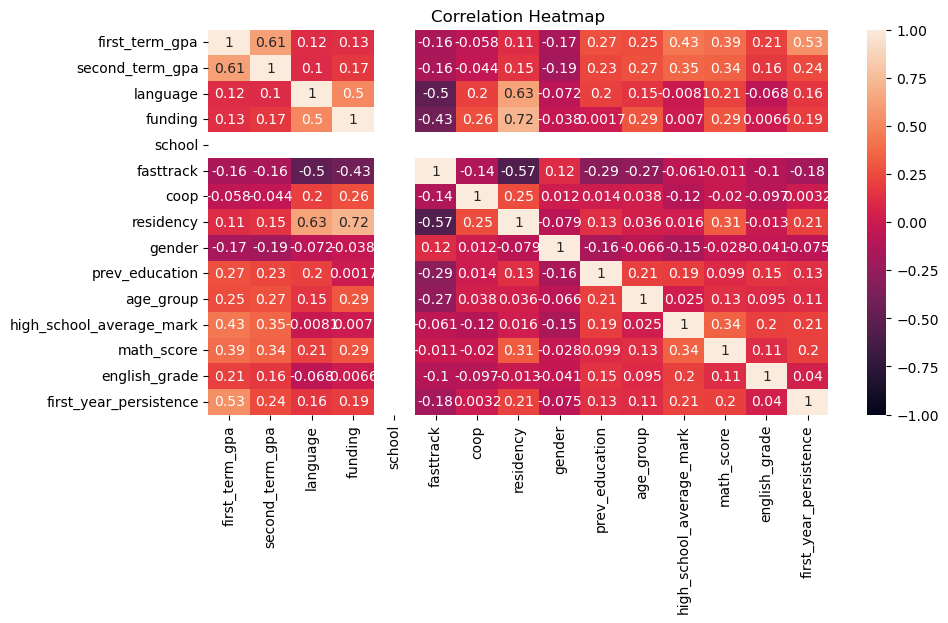

In [136]:
corr_matrix = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap')
plt.show()

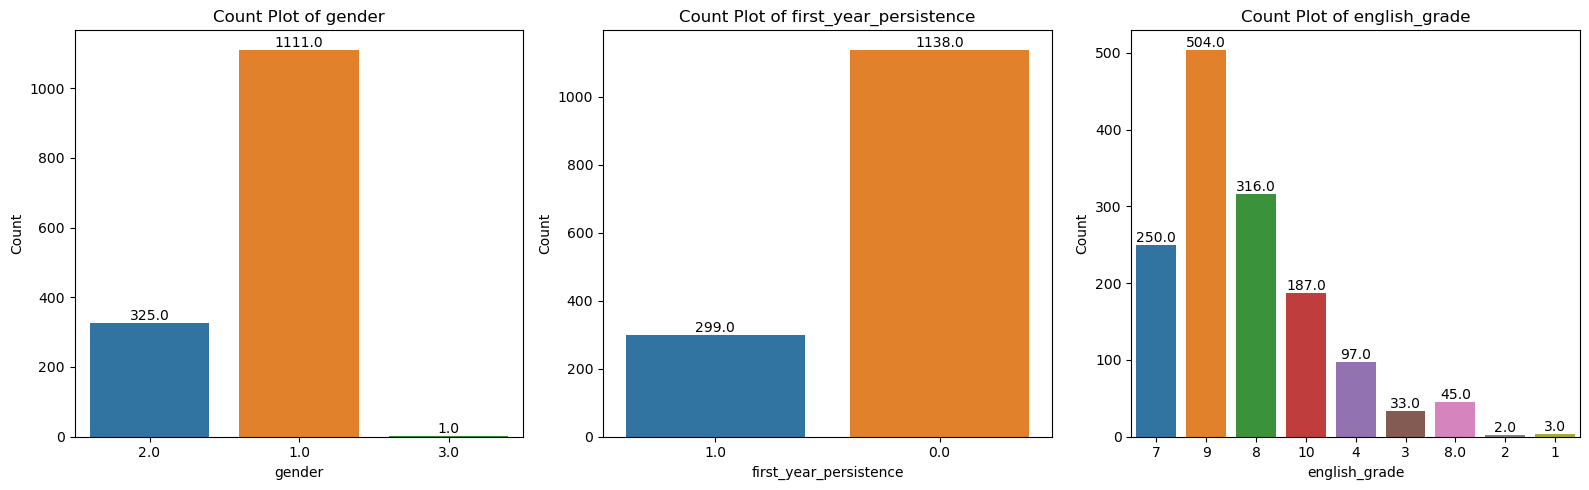

In [180]:
columns = ['gender', 'first_year_persistence',"english_grade"]

fig, axs = plt.subplots(1, len(columns), figsize=(16, 5))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=data, ax=axs[i])
    axs[i].set_title(f'Count Plot of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    for p in axs[i].patches:
        axs[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    axs[i].set_xticks(ticks=range(len(data[col].unique())))
    axs[i].set_xticklabels(labels=data[col].unique())

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

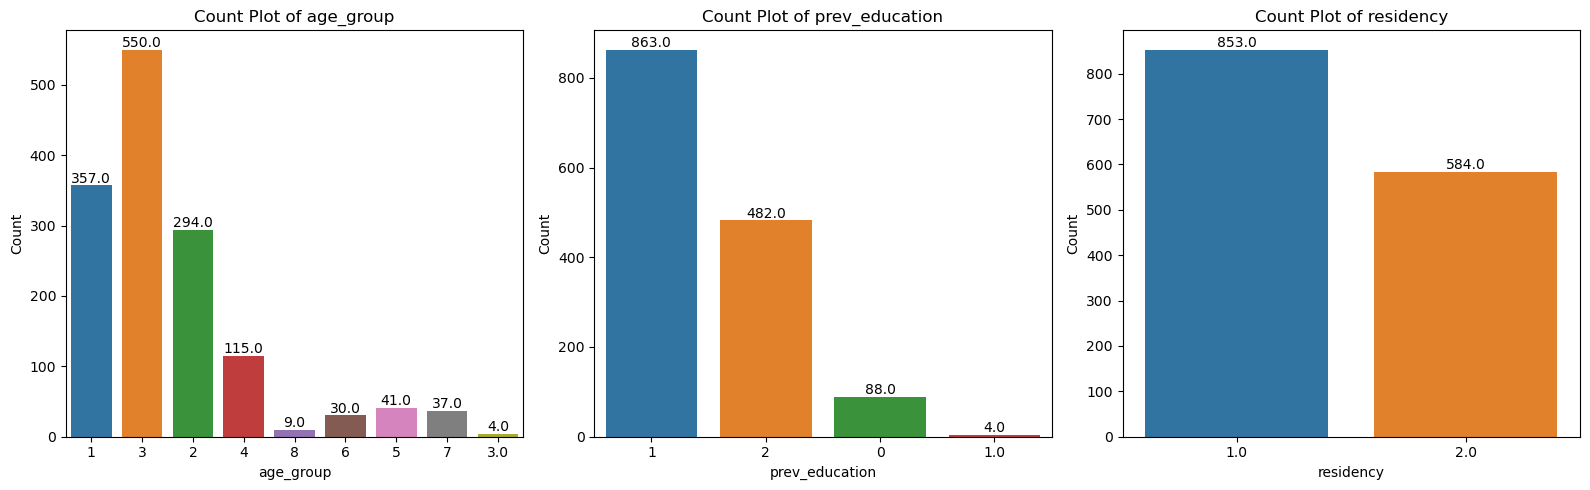

In [181]:
columns = ['age_group', 'prev_education',"residency"]

fig, axs = plt.subplots(1, len(columns), figsize=(16, 5))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=data, ax=axs[i])
    axs[i].set_title(f'Count Plot of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    for p in axs[i].patches:
        axs[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    axs[i].set_xticks(ticks=range(len(data[col].unique())))
    axs[i].set_xticklabels(labels=data[col].unique())

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [115]:
X = data.drop(columns="first_year_persistence")
y = data["first_year_persistence"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [89]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

0.7986111111111112
              precision    recall  f1-score   support

         0.0       1.00      0.16      0.27        69
         1.0       0.79      1.00      0.88       219

    accuracy                           0.80       288
   macro avg       0.90      0.58      0.58       288
weighted avg       0.84      0.80      0.74       288



In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

model = tf.keras.models.Sequential([
    # tf.keras.layers.Dense(64, activation='relu',kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01),input_shape=(X_train.shape[1],)),Dropout(0.1),
    # tf.keras.layers.Dense(40, activation='relu',kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01),input_shape=(X_train.shape[1],)),Dropout(0.1),
    tf.keras.layers.Dense(30, activation='relu',kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01),input_shape=(X_train.shape[1],)),Dropout(0.1),
    # tf.keras.layers.Dense(20, activation='relu',kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01),input_shape=(X_train.shape[1],)),Dropout(0.1),
    tf.keras.layers.Dense(10, activation='relu',kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01),input_shape=(X_train.shape[1],)),Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# X_train = np.asarray(X_train).astype(np.float32)

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=2, callbacks=[early_stopping])



Epoch 1/50
29/29 - 1s - loss: 0.5151 - accuracy: 0.7976 - val_loss: 0.4742 - val_accuracy: 0.7913 - 1s/epoch - 43ms/step
Epoch 2/50
29/29 - 0s - loss: 0.4388 - accuracy: 0.8020 - val_loss: 0.4362 - val_accuracy: 0.7913 - 67ms/epoch - 2ms/step
Epoch 3/50
29/29 - 0s - loss: 0.4239 - accuracy: 0.8107 - val_loss: 0.4210 - val_accuracy: 0.8522 - 61ms/epoch - 2ms/step
Epoch 4/50
29/29 - 0s - loss: 0.4146 - accuracy: 0.8444 - val_loss: 0.4100 - val_accuracy: 0.8435 - 60ms/epoch - 2ms/step
Epoch 5/50
29/29 - 0s - loss: 0.4107 - accuracy: 0.8520 - val_loss: 0.4180 - val_accuracy: 0.8348 - 58ms/epoch - 2ms/step
Epoch 6/50
29/29 - 0s - loss: 0.4090 - accuracy: 0.8346 - val_loss: 0.3794 - val_accuracy: 0.8652 - 58ms/epoch - 2ms/step
Epoch 7/50
29/29 - 0s - loss: 0.4081 - accuracy: 0.8487 - val_loss: 0.3963 - val_accuracy: 0.8696 - 58ms/epoch - 2ms/step
Epoch 8/50
29/29 - 0s - loss: 0.3983 - accuracy: 0.8542 - val_loss: 0.3781 - val_accuracy: 0.8652 - 63ms/epoch - 2ms/step
Epoch 9/50
29/29 - 0s - l

In [106]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.6).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

9/9 [==============================] - 0s 1ms/step
0.8506944444444444
[[ 33  36]
 [  7 212]]
              precision    recall  f1-score   support

         0.0       0.82      0.48      0.61        69
         1.0       0.85      0.97      0.91       219

    accuracy                           0.85       288
   macro avg       0.84      0.72      0.76       288
weighted avg       0.85      0.85      0.84       288



In [94]:
model_pkl_file = "dropout_prediction_model.pkl"  
scaler_plk =- "scaler.pkl"
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)
with open(scaler_plk, 'wb') as file:  
    pickle.dump(scaler, file)

C:\Users\shres\AppData\Roaming\Python\Python311\site-packages\keras\src\regularizers.py:426: UserWarning: The `keras.regularizers.serialize()` API should only be used for objects of type `keras.regularizers.Regularizer`. Found an instance of type <class 'tensorflow.python.keras.regularizers.L2'>, which may lead to improper serialization.
  warnings.warn(


In [95]:
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)
input_data = np.array([[2.5,2,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,77.5,32.0,7]])


In [100]:
scaler.transform(input_data)

C:\Users\shres\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.2990626 , -0.76448095,  1.16021508,  0.84837988,  0.        ,
        -1.67847423,  0.66593343,  1.20628695,  0.54081926, -0.49115627,
         0.24408725,  0.02481009, -0.03855526, -0.62552638]])

In [96]:

y_pred_prob = model.predict(input_data)
y_pred = (y_pred_prob > 0.6).astype(int)
print(y_pred_prob[0],y_pred[0])

1/1 [==============================] - 0s 55ms/step
[0.79524016] [1]


In [97]:
import keras
keras.__version__

'2.15.0'

In [98]:
tf.__version__

'2.15.0'